In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_moons, make_circles, load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

np.random.seed(42)
plt.rcParams['figure.figsize'] = (6, 4)


In [2]:
# Generate a simple linearly separable dataset
X_lin, y_lin = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.8,
    random_state=42,
)

y_lin[:10]  # quick look at labels

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

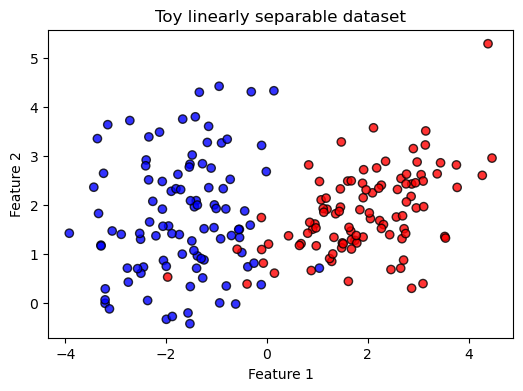

In [3]:
# Visualise the toy dataset
plt.scatter(X_lin[:, 0], X_lin[:, 1], c=y_lin, cmap='bwr', edgecolors='k', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Toy linearly separable dataset')
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X_lin,y_lin,test_size=0.20,random_state=42) 
scaler = StandardScaler() 
x_train_scaled = scaler.fit_transform(X_train) 
x_test_scaled = scaler.transform(X_test) 

In [5]:
svm_linear = SVC(kernel="linear",C=1.0,random_state=42)
svm_linear.fit(x_train_scaled,y_train) 
y_pred = svm_linear.predict(x_test_scaled) 
acc = accuracy_score(y_test,y_pred) 
print("Accuracy Score: ",acc) 

Accuracy Score:  0.975


In [6]:
# Helper function to plot decision boundary for 2D data
def plot_decision_boundary(model, X, y, title='Decision boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

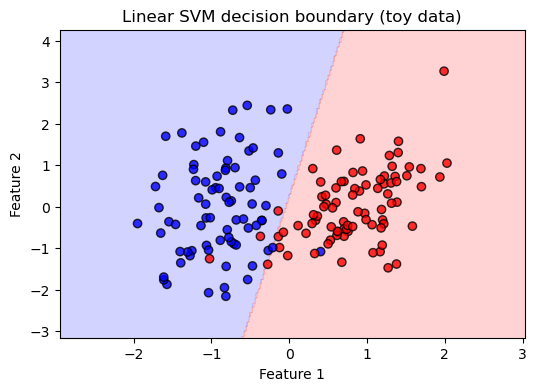

In [7]:
# Visualise the linear SVM boundary on scaled training data
plot_decision_boundary(svm_linear, x_train_scaled, y_train, title='Linear SVM decision boundary (toy data)')

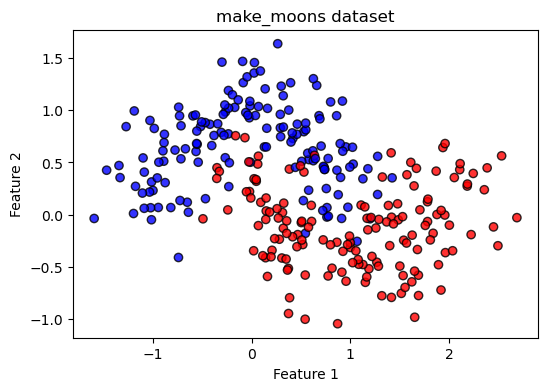

In [8]:
# Generate moons dataset (non linear but simple)
X_moon, y_moon = make_moons(n_samples=300, noise=0.25, random_state=42) 
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap='bwr', edgecolors='k', alpha=0.8)
plt.title('make_moons dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [9]:
# Scale moons data
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moon, y_moon, test_size=0.2, random_state=42
)

scaler_moon = StandardScaler()
X_moon_train_scaled = scaler_moon.fit_transform(X_moon_train)
X_moon_test_scaled = scaler_moon.transform(X_moon_test)

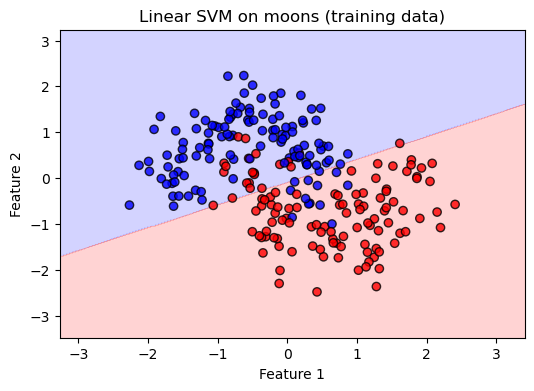

Accuracy (linear kernel on moons): 0.8833333333333333


In [12]:
# Linear kernel on moons
svc_linear_moon = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear_moon.fit(X_moon_train_scaled, y_moon_train)
plot_decision_boundary(svc_linear_moon, X_moon_train_scaled, y_moon_train,
                       title='Linear SVM on moons (training data)')
print('Accuracy (linear kernel on moons):', accuracy_score(y_moon_test,
      svc_linear_moon.predict(X_moon_test_scaled)))

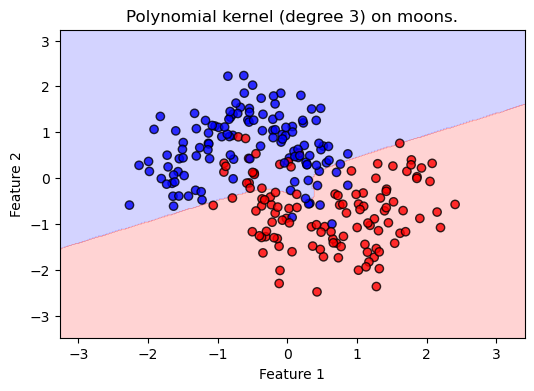

Accuracy (polynomial kernel on moons): 0.9


In [18]:
# Linear kernel on moons
svc_poly_moon = SVC(kernel='poly',degree=3, gamma='scale',C=20.0, random_state=42)
svc_poly_moon.fit(X_moon_train_scaled, y_moon_train)
plot_decision_boundary(svc_poly_moon, X_moon_train_scaled, y_moon_train,
                       title='Polynomial kernel (degree 3) on moons.')
print('Accuracy (polynomial kernel on moons):', accuracy_score(y_moon_test,
      svc_poly_moon.predict(X_moon_test_scaled)))

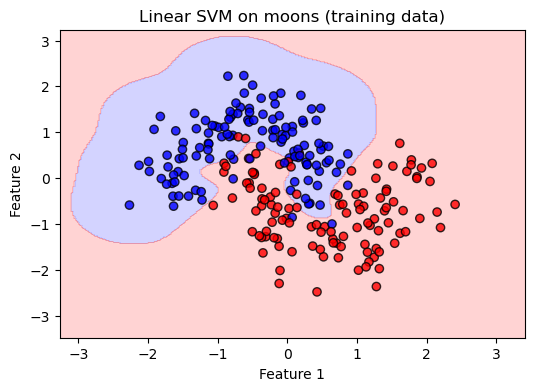

Accuracy (linear kernel on moons): 0.9166666666666666


In [26]:
# Linear kernel on moons
svc_rbf_moon = SVC(kernel='rbf', C=12.0,gamma=3, random_state=42)
svc_rbf_moon.fit(X_moon_train_scaled, y_moon_train)
plot_decision_boundary(svc_rbf_moon, X_moon_train_scaled, y_moon_train,
                       title='Linear SVM on moons (training data)')
print('Accuracy (linear kernel on moons):', accuracy_score(y_moon_test,
      svc_rbf_moon.predict(X_moon_test_scaled)))

In [27]:
cancer = load_breast_cancer() 
X_bc = cancer.data 
y_bc = cancer.target 
print("Feature shape: ",X_bc.shape) 
print("Classes: ",cancer.target_names) 

Feature shape:  (569, 30)
Classes:  ['malignant' 'benign']


In [28]:
X_bc_train,X_bc_test,y_bc_train,y_bc_test = train_test_split(
    X_bc,y_bc,test_size=0.2,random_state=42,stratify=y_bc
)
scaler_bc = StandardScaler() 
X_bc_train_scaled = scaler_bc.fit_transform(X_bc_train) 
X_bc_test_scaled = scaler_bc.transform(X_bc_test) 

In [31]:
svc_bc = SVC(kernel='rbf',C=1.0,gamma='scale',random_state=42)
svc_bc.fit(X_bc_train_scaled,y_bc_train) 
y_bc_pred = svc_bc.predict(X_bc_test_scaled) 
acc_bc = accuracy_score(y_bc_test,y_bc_pred) 

print("Accuracy with RBF:",acc_bc)
print("\nClassification report: ") 
print(classification_report(y_bc_pred,y_bc_test,target_names=cancer.target_names)) 


Accuracy with RBF: 0.9824561403508771

Classification report: 
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

